In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [48]:
with open("../DOCS/[32]custom_cnn_results.json", "r") as f:
    S32 = json.load(f)
with open("../DOCS/[64]custom_cnn_results.json", "r") as f:
    S64 = json.load(f)
with open("../DOCS/[128]custom_cnn_results.json", "r") as f:
    S128 = json.load(f)
with open("../DOCS/[256]custom_cnn_results.json", "r") as f:
    S256 = json.load(f)
with open("../DOCS/TF_results.json", "r") as f:
    TF128 = json.load(f)
print("Data loaded successfully.")

Data loaded successfully.


In [49]:
comp = [("CuPy 32", S32) , ("CuPy 64", S64), ("CuPy 128", S128), ("CuPy 256", S256), ("TensorFlow128", TF128)]

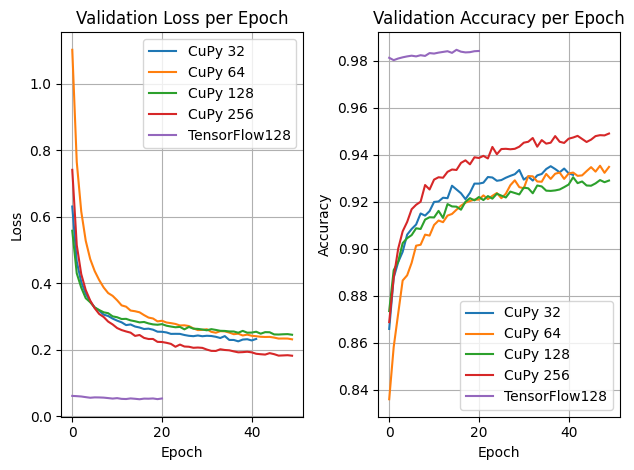

In [50]:
plt.subplot(1, 2, 1)
for label, data in comp:
    
    plt.plot(data['val_loss'], label=label)
plt.title("Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy comparison
plt.subplot(1, 2, 2)
for label, data in comp:
    plt.plot(data['val_accuracy'], label=label)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

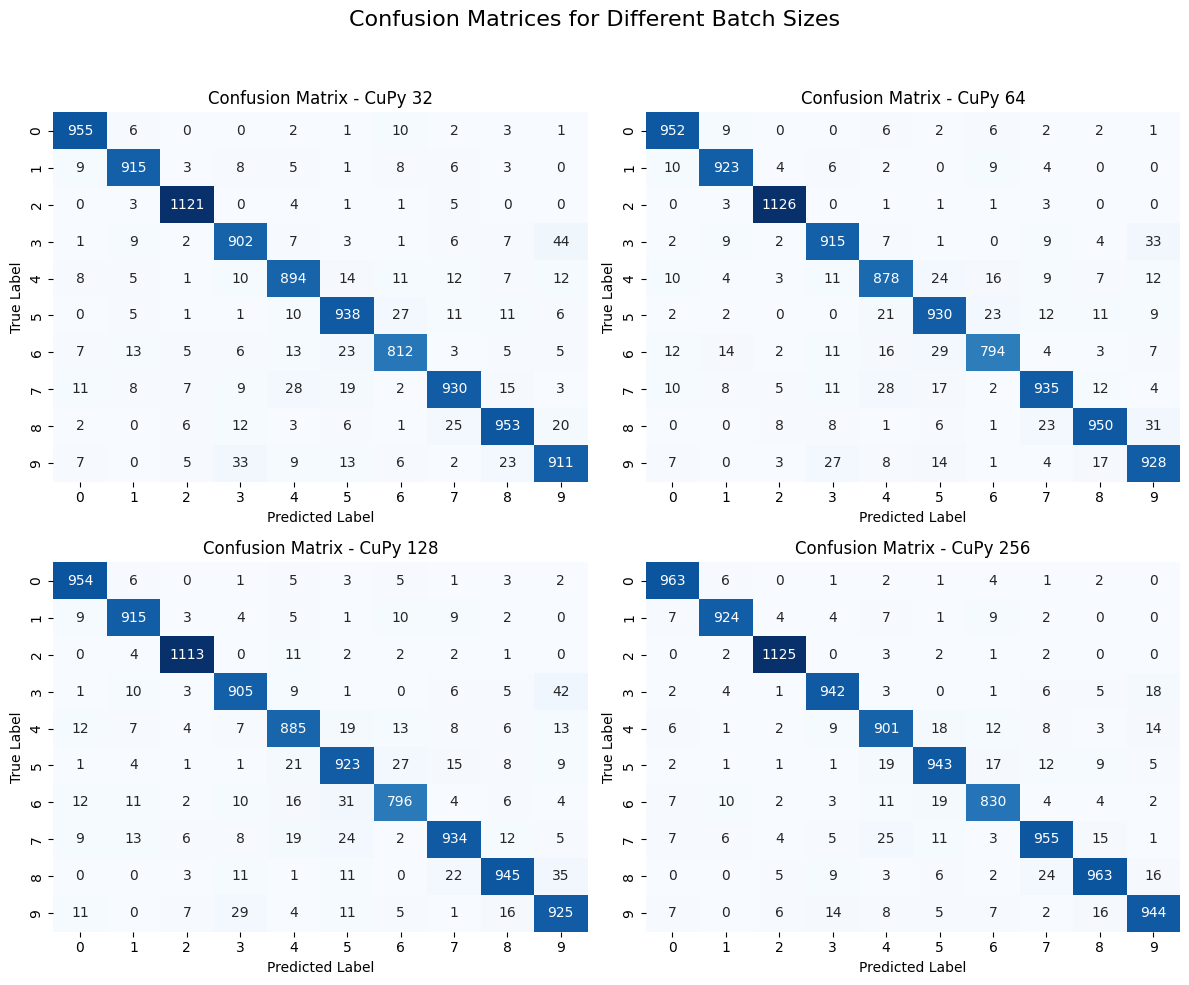

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
comp2 = [("CuPy 32", S32) , ("CuPy 64", S64), ("CuPy 128", S128), ("CuPy 256", S256)]
for i, (label, data) in enumerate(comp2):
    cm = data["confusion_matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax = axes[i])
    axes[i].set_title(f"Confusion Matrix - {label}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.suptitle("Confusion Matrices for Different Batch Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

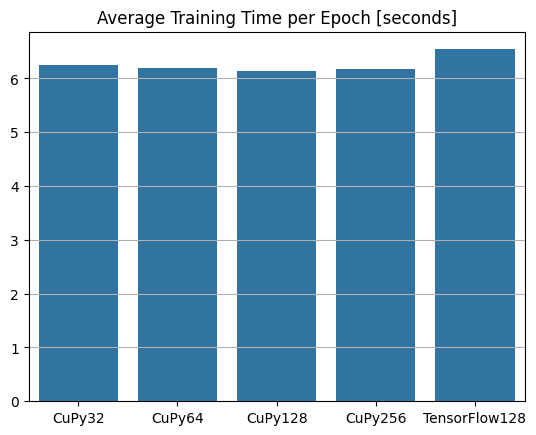

In [52]:

x = ["CuPy32", "CuPy64", "CuPy128", "CuPy256", "TensorFlow128"]
Y = []

for label, data in comp:
    avg_time = data["training_time_seconds"] / data["epochs_done"]
    Y.append(avg_time)
sns.barplot(x=x, y=Y)
plt.grid(axis="y")
plt.title("Average Training Time per Epoch [seconds]")
plt.show()